In [1]:
import pandas as pd
import numpy as np

import kagglehub


path = kagglehub.dataset_download("annafivebrane/mri-brain-tumor-cleaned")

print("Path to dataset files:", path)

100%|██████████| 133M/133M [00:04<00:00, 28.4MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/annafivebrane/mri-brain-tumor-cleaned/versions/1


In [2]:
import os
for dirname, _, filenames in os.walk("/root/.cache/kagglehub/datasets/annafivebrane/mri-brain-tumor-cleaned/versions/1"):
  for filename in filenames:
    print(os.path.join(dirname, filename))

/root/.cache/kagglehub/datasets/annafivebrane/mri-brain-tumor-cleaned/versions/1/brain_tumor_cleaned/Testing/notumor/Te-no_0170_t1QbE.jpg
/root/.cache/kagglehub/datasets/annafivebrane/mri-brain-tumor-cleaned/versions/1/brain_tumor_cleaned/Testing/notumor/Te-no_0344_K8H8R.jpg
/root/.cache/kagglehub/datasets/annafivebrane/mri-brain-tumor-cleaned/versions/1/brain_tumor_cleaned/Testing/notumor/Te-no_0192_qilxY.jpg
/root/.cache/kagglehub/datasets/annafivebrane/mri-brain-tumor-cleaned/versions/1/brain_tumor_cleaned/Testing/notumor/Te-no_0018_GsKel.jpg
/root/.cache/kagglehub/datasets/annafivebrane/mri-brain-tumor-cleaned/versions/1/brain_tumor_cleaned/Testing/notumor/Te-no_0340_gHMBX.jpg
/root/.cache/kagglehub/datasets/annafivebrane/mri-brain-tumor-cleaned/versions/1/brain_tumor_cleaned/Testing/notumor/Te-no_0132_zSZrd.jpg
/root/.cache/kagglehub/datasets/annafivebrane/mri-brain-tumor-cleaned/versions/1/brain_tumor_cleaned/Testing/notumor/Te-no_0326_-yJED.jpg
/root/.cache/kagglehub/datasets/an

In [3]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout
from sklearn.metrics import accuracy_score
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

In [4]:
import cv2
import numpy as np
import os

dataset_base = '/root/.cache/kagglehub/datasets/annafivebrane/mri-brain-tumor-cleaned/versions/1/brain_tumor_cleaned'
image_size = 150

X_train = []
Y_train = []
X_test = []
Y_test = []

print("🚀 Loading dataset with correct structure...")


train_path = os.path.join(dataset_base, 'Training')
if os.path.exists(train_path):
    labels = os.listdir(train_path)
    print(f"🎯 Training Labels: {labels}")

    for label in labels:
        label_path = os.path.join(train_path, label)
        if os.path.isdir(label_path):
            for image_file in os.listdir(label_path):
                if image_file.lower().endswith(('.jpg', '.jpeg', '.png')):
                    img_path = os.path.join(label_path, image_file)
                    img = cv2.imread(img_path)
                    if img is not None:
                        img = cv2.resize(img, (image_size, image_size))
                        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                        X_train.append(img)
                        Y_train.append(label)


test_path = os.path.join(dataset_base, 'Testing')
if os.path.exists(test_path):
    for label in labels:  # Use same labels as training
        label_path = os.path.join(test_path, label)
        if os.path.isdir(label_path):
            for image_file in os.listdir(label_path):
                if image_file.lower().endswith(('.jpg', '.jpeg', '.png')):
                    img_path = os.path.join(label_path, image_file)
                    img = cv2.imread(img_path)
                    if img is not None:
                        img = cv2.resize(img, (image_size, image_size))
                        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                        X_test.append(img)
                        Y_test.append(label)

print(f"" Dataset loaded successfully!")
print(f" Training: {len(X_train)} images")
print(f" Testing: {len(X_test)} images")
print(f" Unique labels: {np.unique(Y_train)}")

🚀 Loading dataset with correct structure...
🎯 Training Labels: ['notumor', 'pituitary', 'meningioma', 'glioma']
✅ Dataset loaded successfully!
📊 Training: 5099 images
📊 Testing: 1118 images
🎯 Unique labels: ['glioma' 'meningioma' 'notumor' 'pituitary']


In [5]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)

X_train, Y_train = shuffle(X_train, Y_train, random_state = 101)

x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size = 0.2, random_state = 101)


In [6]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical


label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)  # Converts to 0,1,2,3
y_test_encoded = label_encoder.transform(y_test)


y_train = to_categorical(y_train_encoded, num_classes=4)
y_test = to_categorical(y_test_encoded, num_classes=4)


print(f"Label mapping: {list(zip(label_encoder.classes_, range(4)))}")

✅ Labels converted successfully!
Label mapping: [(np.str_('glioma'), 0), (np.str_('meningioma'), 1), (np.str_('notumor'), 2), (np.str_('pituitary'), 3)]


In [7]:
import numpy as np



if len(y_train.shape) > 1:
    y_train_labels = np.argmax(y_train, axis=1)
else:
    y_train_labels = y_train


unique, counts = np.unique(y_train_labels, return_counts=True)
class_names = ['glioma', 'meningioma', 'notumor', 'pituitary']

print("\n CLASS DISTRIBUTION:")
for i, (label, count) in enumerate(zip(unique, counts)):
    percentage = (count / len(y_train_labels)) * 100
    print(f"   {class_names[label]}: {count} images ({percentage:.1f}%)")


max_count = max(counts)
min_count = min(counts)
imbalance_ratio = max_count / min_count

print(f"\n IMBALANCE RATIO: {imbalance_ratio:.2f}x")

if imbalance_ratio > 2:
    print("  Significant class imbalance detected!")
else:
    print(" Class distribution is fairly balanced")

📊 CLASS IMBALANCE CHECK

🎯 CLASS DISTRIBUTION:
   glioma: 1054 images (25.8%)
   meningioma: 1039 images (25.5%)
   notumor: 828 images (20.3%)
   pituitary: 1158 images (28.4%)

⚖️ IMBALANCE RATIO: 1.40x
✅ Class distribution is fairly balanced


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping


model = Sequential([

    Conv2D(64, (3, 3), activation='relu', padding='same',
           kernel_regularizer=l2(1e-4), input_shape=(150, 150, 3)),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.3),


    Conv2D(128, (3, 3), activation='relu', padding='same',
           kernel_regularizer=l2(1e-4)),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.3),


    Conv2D(256, (3, 3), activation='relu', padding='same',
           kernel_regularizer=l2(1e-4)),
    BatchNormalization(),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.4),


    Conv2D(512, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    GlobalAveragePooling2D(),
    Dropout(0.5),


    Dense(512, activation='relu', kernel_regularizer=l2(1e-4)),
    BatchNormalization(),
    Dropout(0.5),

    Dense(256, activation='relu', kernel_regularizer=l2(1e-4)),
    BatchNormalization(),
    Dropout(0.4),

    Dense(4, activation='softmax')
])


model.compile(
    optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-7),
    EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
]


model.summary()

🎯 OPTIMAL BRAIN TUMOR MODEL CREATED!


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 150, 150, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 150, 150, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 75, 75, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 75, 75, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 37, 37, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 37, 37, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 18, 18, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │             

 Total params: 2,729,284 (10.41 MB)

 Trainable params: 2,724,932 (10.39 MB)

 Non-trainable params: 4,352 (17.00 KB)

In [10]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np


y_train_labels = np.argmax(y_train, axis=1)
class_weights = compute_class_weight('balanced', classes=np.unique(y_train_labels), y=y_train_labels)
class_weight_dict = {i: weight for i, weight in enumerate(class_weights)}

print("🎯 Class Weights:", class_weight_dict)


history = model.fit(
    x_train, y_train,
    epochs=100,
    validation_split=0.2,
    class_weight=class_weight_dict,
    callbacks=callbacks,
    verbose=1
)

🎯 Class Weights: {0: np.float64(0.9675047438330171), 1: np.float64(0.9814725697786333), 2: np.float64(1.2315821256038648), 3: np.float64(0.8806131260794473)}
Epoch 1/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 116s 1s/step - accuracy: 0.5411 - loss: 1.3786 - val_accuracy: 0.2132 - val_loss: 17.1821 - learning_rate: 0.0010
Epoch 2/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 18s 353ms/step - accuracy: 0.7324 - loss: 0.8396 - val_accuracy: 0.2304 - val_loss: 8.8543 - learning_rate: 0.0010
Epoch 3/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 18s 356ms/step - accuracy: 0.7977 - loss: 0.6673 - val_accuracy: 0.5098 - val_loss: 2.9787 - learning_rate: 0.0010
Epoch 4/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 18s 361ms/step - accuracy: 0.8201 - loss: 0.6236 - val_accuracy: 0.3676 - val_loss: 7.6973 - learning_rate: 0.0010
Epoch 5/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 19s 363ms/step - accuracy: 0.8523 - loss: 0.5238 - val_accuracy: 0.3002 - val_loss: 4.7195 - learning_rate: 0.0010
Epoch 6/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 19s 365ms/step - accuracy: 0.8463 

In [11]:
def comprehensive_evaluation(model, x_test, y_test, class_names):

    print("🧠 COMPREHENSIVE MODEL EVALUATION")
    print("=" * 50)


    test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
    print(f"🏆 Overall Test Accuracy: {test_accuracy:.2%}")
    print(f"📉 Test Loss: {test_loss:.4f}")


    y_pred = model.predict(x_test, verbose=0)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_test, axis=1)


    print(f"\n🎯 Per-Class Performance:")
    for i, class_name in enumerate(class_names):
        class_mask = (y_true_classes == i)
        accuracy = np.mean(y_pred_classes[class_mask] == y_true_classes[class_mask])
        print(f"   {class_name}: {accuracy:.2%}")


    confidence = np.max(y_pred, axis=1)
    correct_mask = (y_pred_classes == y_true_classes)
    print(f"\n📊 Confidence Analysis:")
    print(f"   Average confidence: {np.mean(confidence):.2%}")
    print(f"   Correct predictions confidence: {np.mean(confidence[correct_mask]):.2%}")
    print(f"   Wrong predictions confidence: {np.mean(confidence[~correct_mask]):.2%}")

    return test_accuracy


final_accuracy = comprehensive_evaluation(model, x_test, y_test, class_names)

🧠 COMPREHENSIVE MODEL EVALUATION
🏆 Overall Test Accuracy: 96.86%
📉 Test Loss: 0.2191

🎯 Per-Class Performance:
   glioma: 95.88%
   meningioma: 94.98%
   notumor: 97.65%
   pituitary: 98.93%

📊 Confidence Analysis:
   Average confidence: 98.62%
   Correct predictions confidence: 99.12%
   Wrong predictions confidence: 83.21%


In [12]:
model.save('Josh2_brain_tumor_detector.h5')

In [43]:
import cv2
import numpy as np
import os
from tensorflow.keras.models import load_model
import joblib

class BrainTumorPredictor:
    def __init__(self, model_path, encoder_path=None):

        self.model = load_model(model_path)
        self.image_size = 150
        self.class_names = ['glioma', 'meningioma', 'notumor', 'pituitary']


        if encoder_path and os.path.exists(encoder_path):
            self.label_encoder = joblib.load(encoder_path)
        else:
            from sklearn.preprocessing import LabelEncoder
            self.label_encoder = LabelEncoder()
            self.label_encoder.fit(self.class_names)



    def load_image(self, image_path):
        """Load and validate image"""
        if not os.path.exists(image_path):
            raise FileNotFoundError(f"❌ Image not found: {image_path}")


        img = cv2.imread(image_path)
        if img is None:
            raise ValueError(f"❌ Could not load image: {image_path}")


        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        return img

    def preprocess(self, image):


        img_resized = cv2.resize(image, (self.image_size, self.image_size))


        img_normalized = img_resized.astype('float32') / 255.0


        img_batch = np.expand_dims(img_normalized, axis=0)

        return img_batch

    def predict(self, image_path):

        print(f"\n🎯 ANALYZING: {os.path.basename(image_path)}")
        print("=" * 50)

        try:

            raw_image = self.load_image(image_path)


            processed_image = self.preprocess(raw_image)


            predictions = self.model.predict(processed_image, verbose=0)[0]


            result = self.interpret_predictions(predictions)

            print("=" * 50)
            print("🎉 ANALYSIS COMPLETE")

            return result

        except Exception as e:
            print(f"❌ Prediction failed: {e}")
            return {'error': str(e)}

    def interpret_predictions(self, predictions):

        predicted_idx = np.argmax(predictions)
        predicted_class = self.class_names[predicted_idx]
        confidence = predictions[predicted_idx]


        all_probabilities = {
            self.class_names[i]: float(prob)
            for i, prob in enumerate(predictions)
        }


        if confidence > 0.95:
            confidence_level = "VERY HIGH"
            emoji = "🎯"
        elif confidence > 0.85:
            confidence_level = "HIGH"
            emoji = "✅"
        elif confidence > 0.70:
            confidence_level = "MODERATE"
            emoji = "⚠️"
        else:
            confidence_level = "LOW"
            emoji = "🔍"


        # Display results
        print(f"\n{emoji} DIAGNOSIS RESULTS:")
        print(f"   Tumor Type: {predicted_class}")
        print(f"   Confidence: {confidence:.2%} ({confidence_level})")



    def predict_batch(self, image_paths):

        results = []
        for image_path in image_paths:
            result = self.predict(image_path)
            results.append(result)
        return results


predictor = BrainTumorPredictor(
    model_path='Josh2_brain_tumor_detector.h5',
    encoder_path='label_encoder.pkl'
)

In [41]:
# Single prediction
result = predictor.predict('/content/image(11).jpg')
print(f"Result: {result}")



🎯 ANALYZING: image(11).jpg
🧠 Running AI analysis...

🔍 DIAGNOSIS RESULTS:
   Tumor Type: meningioma
   Confidence: 50.52% (LOW)

📊 PROBABILITY BREAKDOWN:
   🎯 meningioma   → 50.52%
      glioma       → 49.45%
      notumor      → 0.02%
      pituitary    → 0.00%

💡 Typically slow-growing tumors on brain surface. Neurological consultation advised. Additional scans or expert consultation strongly recommended. ⚠️ AI ASSISTANT: Educational purposes only. Always consult healthcare professionals.
🎉 ANALYSIS COMPLETE
Result: {'predicted_tumor_type': 'meningioma', 'confidence': 0.5052238702774048, 'confidence_level': 'LOW', 'all_probabilities': {'glioma': 0.494502454996109, 'meningioma': 0.5052238702774048, 'notumor': 0.00023467310529667884, 'pituitary': 3.897716669598594e-05}, 'medical_advice': 'Typically slow-growing tumors on brain surface. Neurological consultation advised. Additional scans or expert consultation strongly recommended. ⚠️ AI ASSISTANT: Educational purposes only. Always con

In [20]:
import numpy as np
from collections import Counter


y_pred = model.predict(x_test, verbose=0)
y_pred_classes = np.argmax(y_pred, axis=1)


prediction_counts = Counter(y_pred_classes)
class_names = ['glioma', 'meningioma', 'notumor', 'pituitary']

print("\n📊 PREDICTION DISTRIBUTION:")
for i, class_name in enumerate(class_names):
    count = prediction_counts[i]
    percentage = (count / len(y_pred_classes)) * 100
    print(f"   {class_name}: {count} predictions ({percentage:.1f}%)")


max_class = max(prediction_counts, key=prediction_counts.get)
max_percentage = (prediction_counts[max_class] / len(y_pred_classes)) * 100

if max_percentage > 80:
    print(f"\n🚨 ALERT: Model is predicting {max_percentage:.1f}% as {class_names[max_class]}!")
    print("   This suggests class imbalance or model collapse")

🔍 CHECKING PREDICTION DISTRIBUTION...

📊 PREDICTION DISTRIBUTION:
   glioma: 266 predictions (26.1%)
   meningioma: 262 predictions (25.7%)
   notumor: 210 predictions (20.6%)
   pituitary: 282 predictions (27.6%)


In [21]:

y_true_classes = np.argmax(y_test, axis=1)

print("\n🔍 ACTUAL vs PREDICTED ANALYSIS:")
for i, class_name in enumerate(class_names):
    actual_count = np.sum(y_true_classes == i)
    predicted_count = np.sum(y_pred_classes == i)

    print(f"\n{class_name}:")
    print(f"   Actual: {actual_count} samples")
    print(f"   Predicted: {predicted_count} samples")
    print(f"   Accuracy: {np.mean(y_pred_classes[y_true_classes == i] == i):.2%}")


🔍 ACTUAL vs PREDICTED ANALYSIS:

glioma:
   Actual: 267 samples
   Predicted: 266 samples
   Accuracy: 95.88%

meningioma:
   Actual: 259 samples
   Predicted: 262 samples
   Accuracy: 94.98%

notumor:
   Actual: 213 samples
   Predicted: 210 samples
   Accuracy: 97.65%

pituitary:
   Actual: 281 samples
   Predicted: 282 samples
   Accuracy: 98.93%


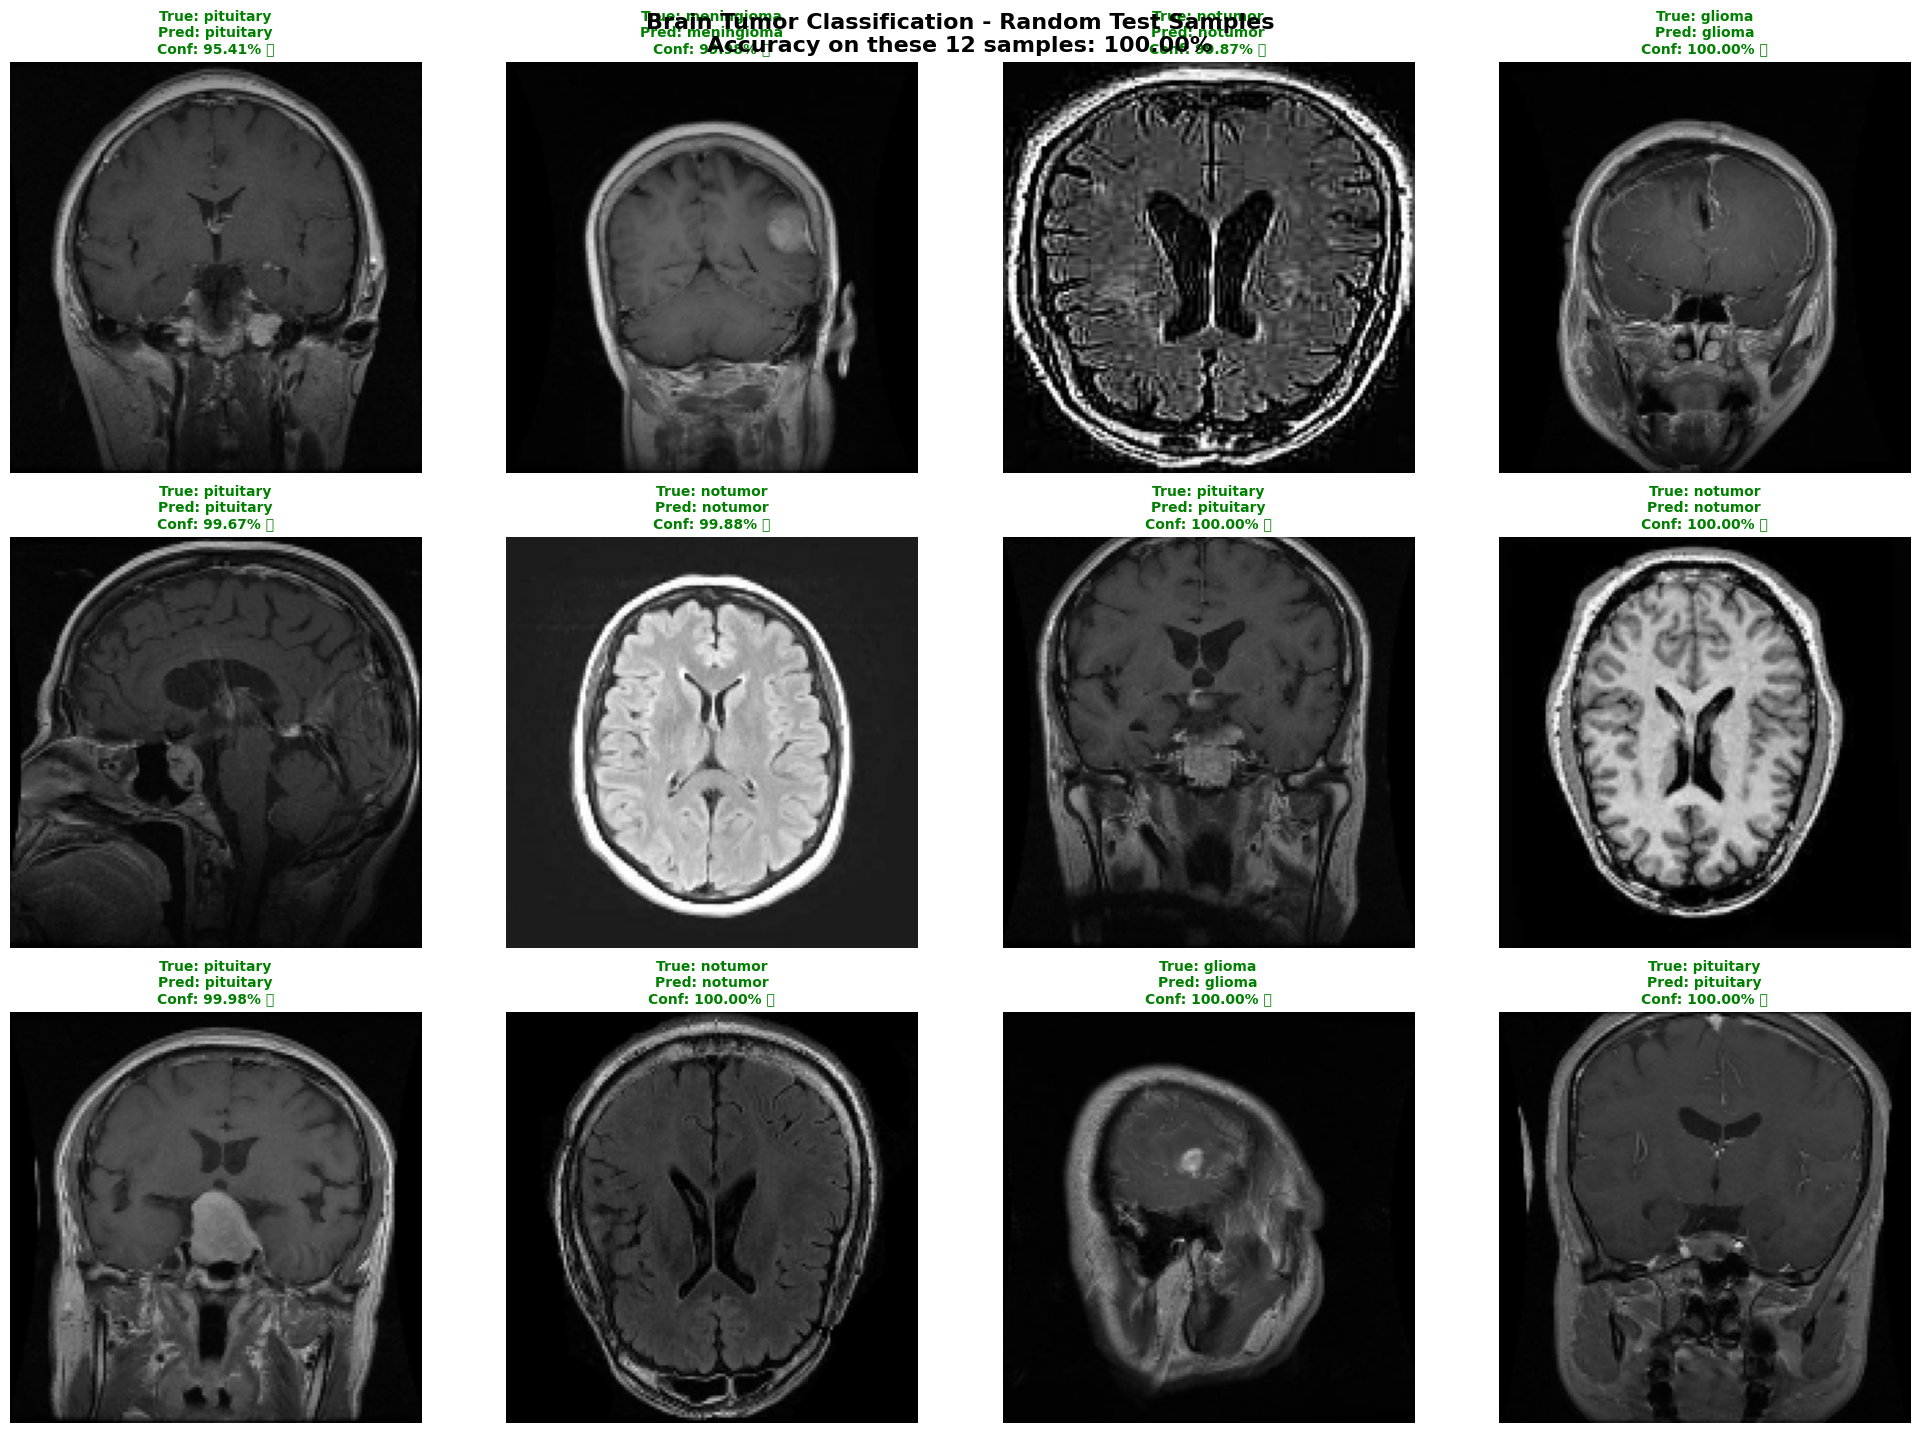

🎯 Accuracy on 12 random samples: 100.00%


In [44]:
import matplotlib.pyplot as plt
import numpy as np
import random

def test_and_visualize_random_samples(model, x_test, y_test, num_samples=12):

    indices = random.sample(range(len(x_test)), num_samples)


    fig, axes = plt.subplots(3, 4, figsize=(20, 15))
    axes = axes.ravel()


    class_names = ['glioma', 'meningioma', 'notumor', 'pituitary']

    correct_predictions = 0

    for i, idx in enumerate(indices):

        test_image = x_test[idx:idx+1]
        true_label = np.argmax(y_test[idx])


        prediction = model.predict(test_image, verbose=0)[0]
        predicted_label = np.argmax(prediction)
        confidence = np.max(prediction)


        true_class = class_names[true_label]
        predicted_class = class_names[predicted_label]


        is_correct = (true_label == predicted_label)
        if is_correct:
            correct_predictions += 1


        axes[i].imshow(x_test[idx])


        color = 'green' if is_correct else 'red'
        title = f"True: {true_class}\nPred: {predicted_class}\nConf: {confidence:.2%}"
        if not is_correct:
            title += " ❌"
        else:
            title += " ✅"

        axes[i].set_title(title, color=color, fontweight='bold', fontsize=10)
        axes[i].axis('off')


    accuracy = correct_predictions / num_samples

    plt.suptitle(f'Brain Tumor Classification - Random Test Samples\n'
                f'Accuracy on these {num_samples} samples: {accuracy:.2%}',
                fontsize=16, fontweight='bold', y=0.95)
    plt.tight_layout()
    plt.show()

    print(f"🎯 Accuracy on {num_samples} random samples: {accuracy:.2%}")
    return accuracy


accuracy = test_and_visualize_random_samples(model, x_test, y_test, num_samples=12)

🧠 Initializing Comprehensive Medical Evaluation...
📊 Test Samples: 1020
🎯 Classes: ['glioma', 'meningioma', 'notumor', 'pituitary']

🏥 COMPREHENSIVE BRAIN TUMOR DETECTION ACCURACIES

📈 1. BASIC ACCURACY METRICS
------------------------------
🎯 Overall Accuracy: 0.9686 (96.86%)
⚖️  Balanced Accuracy: 0.9686 (96.86%)
🥈 Top-2 Accuracy: 0.9961 (99.61%)
🥉 Top-3 Accuracy: 0.9990 (99.90%)

🎯 2. PER-CLASS PERFORMANCE METRICS
-----------------------------------
   glioma       → Acc: 95.88% | Precision: 96.24% | Recall: 95.88% | F1: 96.06%
   meningioma   → Acc: 94.98% | Precision: 93.89% | Recall: 94.98% | F1: 94.43%
   notumor      → Acc: 97.65% | Precision: 99.05% | Recall: 97.65% | F1: 98.35%
   pituitary    → Acc: 98.93% | Precision: 98.58% | Recall: 98.93% | F1: 98.76%

   Macro Avg    → Precision: 96.94% | Recall: 96.86% | F1: 96.90%
   Weighted Avg → Precision: 96.88% | Recall: 96.86% | F1: 96.87%

💪 3. CONFIDENCE AND CALIBRATION METRICS
----------------------------------------
   Avera

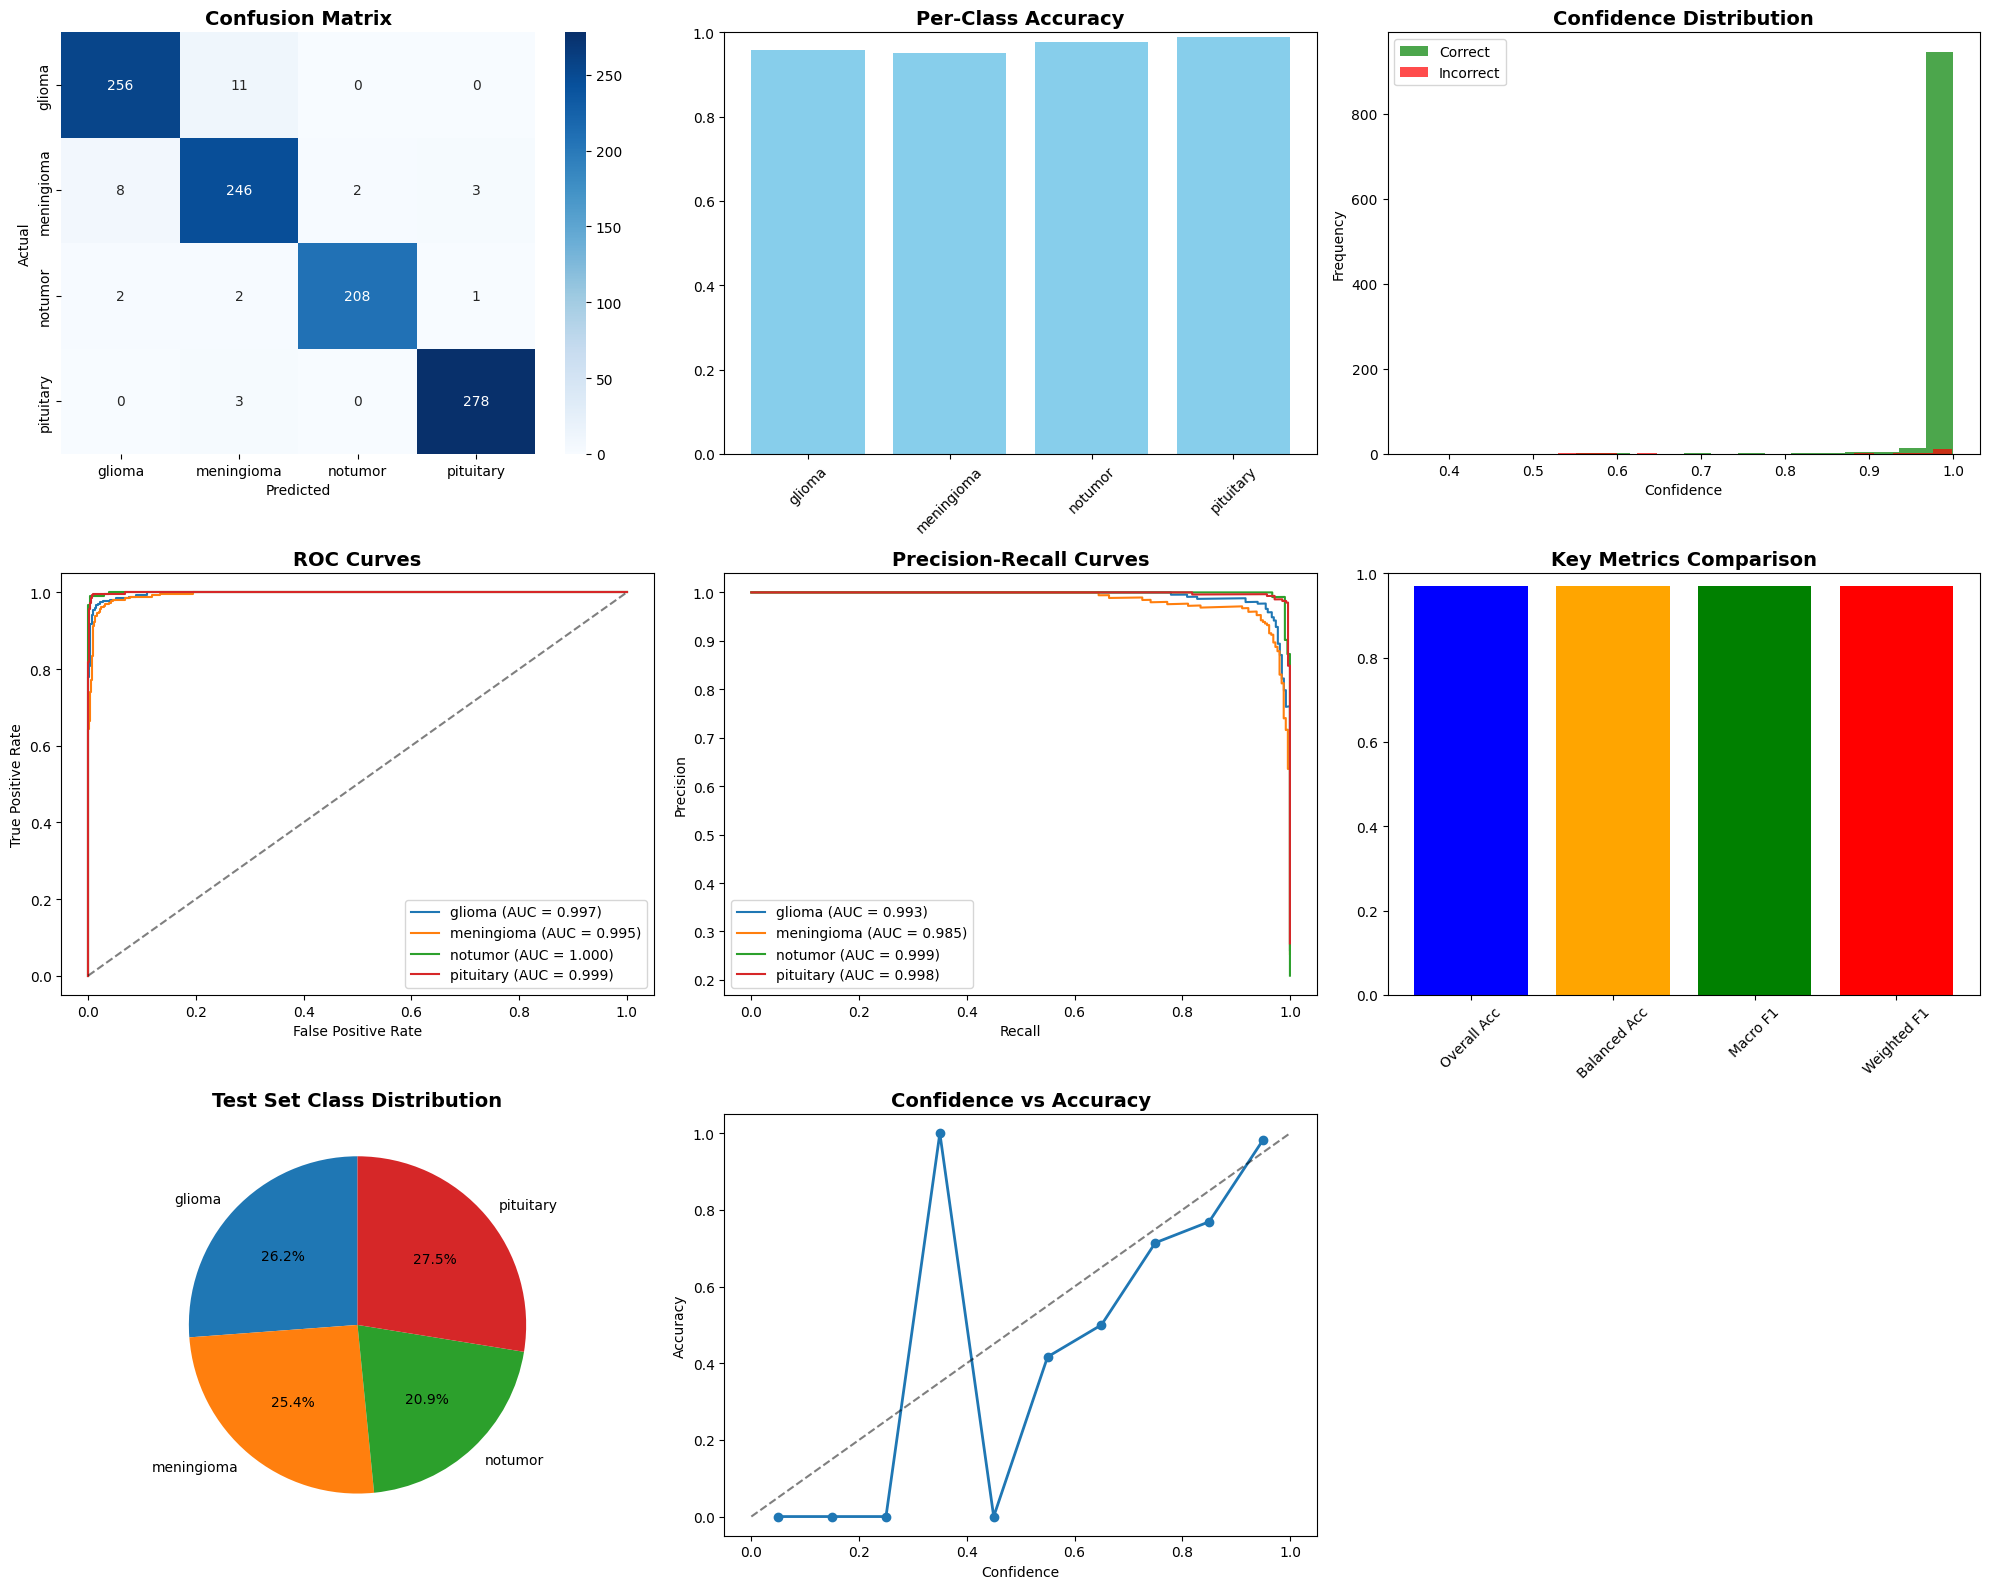


🎯 FINAL COMPREHENSIVE EVALUATION SUMMARY

📈 OVERALL PERFORMANCE:
   Overall Accuracy: 96.86%
   Balanced Accuracy: 96.86%
   Macro F1-Score: 96.90%
   Weighted F1-Score: 96.87%
   Cohen's Kappa: 0.9580
   Matthews Correlation: 0.9580

🏥 MEDICAL PERFORMANCE:
   Sensitivity: 99.75%
   Specificity: 97.65%
   Diagnostic Accuracy: 99.31%

💪 MODEL CONFIDENCE:
   Average Confidence: 98.62%
   Confidence Gap: 0.1591
   High Confidence Accuracy: 97.99%

📊 AUC SCORES:
   Mean ROC AUC: 0.9977
   Mean PR AUC: 0.9937

🎯 PER-CLASS ACCURACIES:
   glioma      : 95.88%
   meningioma  : 94.98%
   notumor     : 97.65%
   pituitary   : 98.93%


In [34]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.preprocessing import label_binarize
from tensorflow.keras.models import Model
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

class ComprehensiveMedicalEvaluator:


    def __init__(self, model, x_test, y_test, class_names):
        self.model = model
        self.x_test = x_test
        self.y_test = y_test
        self.class_names = class_names
        self.num_classes = len(class_names)


        self.y_true = np.argmax(y_test, axis=1)
        self.y_pred_proba = model.predict(x_test, verbose=0)
        self.y_pred = np.argmax(self.y_pred_proba, axis=1)

        print("🧠 Initializing Comprehensive Medical Evaluation...")
        print(f"📊 Test Samples: {len(self.y_true)}")
        print(f"🎯 Classes: {class_names}")

    def get_all_accuracies(self):

        print("\n" + "="*60)
        print("🏥 COMPREHENSIVE BRAIN TUMOR DETECTION ACCURACIES")
        print("="*60)

        results = {}


        results.update(self._calculate_basic_accuracies())


        results.update(self._calculate_per_class_metrics())


        results.update(self._calculate_confidence_metrics())


        results.update(self._calculate_medical_metrics())


        results.update(self._calculate_advanced_metrics())


        self._create_comprehensive_visualizations(results)

        return results

    def _calculate_basic_accuracies(self):

        print("\n📈 1. BASIC ACCURACY METRICS")
        print("-" * 30)


        overall_accuracy = np.mean(self.y_true == self.y_pred)


        balanced_accuracy = self._calculate_balanced_accuracy()


        top2_accuracy = self._calculate_top_k_accuracy(k=2)


        top3_accuracy = self._calculate_top_k_accuracy(k=3)

        print(f"🎯 Overall Accuracy: {overall_accuracy:.4f} ({overall_accuracy:.2%})")
        print(f"⚖️  Balanced Accuracy: {balanced_accuracy:.4f} ({balanced_accuracy:.2%})")
        print(f"🥈 Top-2 Accuracy: {top2_accuracy:.4f} ({top2_accuracy:.2%})")
        print(f"🥉 Top-3 Accuracy: {top3_accuracy:.4f} ({top3_accuracy:.2%})")

        return {
            'overall_accuracy': overall_accuracy,
            'balanced_accuracy': balanced_accuracy,
            'top2_accuracy': top2_accuracy,
            'top3_accuracy': top3_accuracy
        }

    def _calculate_per_class_metrics(self):

        print("\n🎯 2. PER-CLASS PERFORMANCE METRICS")
        print("-" * 35)

        per_class_accuracies = {}
        class_precisions = {}
        class_recalls = {}
        class_f1_scores = {}


        cm = confusion_matrix(self.y_true, self.y_pred)

        for i, class_name in enumerate(self.class_names):

            tp = cm[i, i]
            fp = cm[:, i].sum() - tp
            fn = cm[i, :].sum() - tp
            tn = cm.sum() - (tp + fp + fn)


            class_accuracy = tp / (tp + fn) if (tp + fn) > 0 else 0


            precision = tp / (tp + fp) if (tp + fp) > 0 else 0
            recall = tp / (tp + fn) if (tp + fn) > 0 else 0
            f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

            per_class_accuracies[class_name] = class_accuracy
            class_precisions[class_name] = precision
            class_recalls[class_name] = recall
            class_f1_scores[class_name] = f1

            print(f"   {class_name:12} → Acc: {class_accuracy:.2%} | "
                  f"Precision: {precision:.2%} | Recall: {recall:.2%} | F1: {f1:.2%}")


        macro_precision = np.mean(list(class_precisions.values()))
        macro_recall = np.mean(list(class_recalls.values()))
        macro_f1 = np.mean(list(class_f1_scores.values()))


        class_counts = [np.sum(self.y_true == i) for i in range(self.num_classes)]
        weighted_precision = np.average(list(class_precisions.values()), weights=class_counts)
        weighted_recall = np.average(list(class_recalls.values()), weights=class_counts)
        weighted_f1 = np.average(list(class_f1_scores.values()), weights=class_counts)

        print(f"\n   {'Macro Avg':12} → Precision: {macro_precision:.2%} | "
              f"Recall: {macro_recall:.2%} | F1: {macro_f1:.2%}")
        print(f"   {'Weighted Avg':12} → Precision: {weighted_precision:.2%} | "
              f"Recall: {weighted_recall:.2%} | F1: {weighted_f1:.2%}")

        return {
            'per_class_accuracies': per_class_accuracies,
            'per_class_precision': class_precisions,
            'per_class_recall': class_recalls,
            'per_class_f1': class_f1_scores,
            'macro_precision': macro_precision,
            'macro_recall': macro_recall,
            'macro_f1': macro_f1,
            'weighted_precision': weighted_precision,
            'weighted_recall': weighted_recall,
            'weighted_f1': weighted_f1
        }

    def _calculate_confidence_metrics(self):

        print("\n💪 3. CONFIDENCE AND CALIBRATION METRICS")
        print("-" * 40)


        confidence_scores = np.max(self.y_pred_proba, axis=1)


        correct_mask = (self.y_true == self.y_pred)
        correct_confidence = confidence_scores[correct_mask]
        wrong_confidence = confidence_scores[~correct_mask]


        confidence_gap = np.mean(correct_confidence) - np.mean(wrong_confidence) if len(wrong_confidence) > 0 else 0


        high_conf_threshold = 0.8
        high_conf_mask = confidence_scores >= high_conf_threshold
        high_conf_accuracy = np.mean(self.y_true[high_conf_mask] == self.y_pred[high_conf_mask]) if np.sum(high_conf_mask) > 0 else 0

        low_conf_threshold = 0.5
        low_conf_mask = confidence_scores <= low_conf_threshold
        low_conf_accuracy = np.mean(self.y_true[low_conf_mask] == self.y_pred[low_conf_mask]) if np.sum(low_conf_mask) > 0 else 0


        ece = self._calculate_expected_calibration_error()

        print(f"   Average Confidence: {np.mean(confidence_scores):.2%}")
        print(f"   Correct Predictions Confidence: {np.mean(correct_confidence):.2%}")
        print(f"   Wrong Predictions Confidence: {np.mean(wrong_confidence):.2%}" if len(wrong_confidence) > 0 else "   No wrong predictions")
        print(f"   Confidence Gap: {confidence_gap:.4f} ({confidence_gap:.2%})")
        print(f"   High Confidence (>80%) Accuracy: {high_conf_accuracy:.2%}")
        print(f"   Low Confidence (<50%) Accuracy: {low_conf_accuracy:.2%}")
        print(f"   Expected Calibration Error: {ece:.4f}")

        return {
            'average_confidence': np.mean(confidence_scores),
            'correct_confidence': np.mean(correct_confidence) if len(correct_confidence) > 0 else 0,
            'wrong_confidence': np.mean(wrong_confidence) if len(wrong_confidence) > 0 else 0,
            'confidence_gap': confidence_gap,
            'high_confidence_accuracy': high_conf_accuracy,
            'low_confidence_accuracy': low_conf_accuracy,
            'expected_calibration_error': ece
        }

    def _calculate_medical_metrics(self):

        print("\n🏥 4. MEDICAL-SPECIFIC METRICS")
        print("-" * 30)

        # Tumor vs No-Tumor binary classification
        tumor_classes = [i for i, name in enumerate(self.class_names) if name != 'notumor']
        no_tumor_class = [i for i, name in enumerate(self.class_names) if name == 'notumor']

        if no_tumor_class:
            no_tumor_idx = no_tumor_class[0]


            y_true_binary = (self.y_true != no_tumor_idx).astype(int)
            y_pred_binary = (self.y_pred != no_tumor_idx).astype(int)


            cm_binary = confusion_matrix(y_true_binary, y_pred_binary)
            tn, fp, fn, tp = cm_binary.ravel()

            sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
            specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
            ppv = tp / (tp + fp) if (tp + fp) > 0 else 0
            npv = tn / (tn + fn) if (tn + fn) > 0 else 0


            diagnostic_accuracy = (tp + tn) / (tp + tn + fp + fn)


            fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
            fnr = fn / (fn + tp) if (fn + tp) > 0 else 0

            print(f"   Sensitivity (True Positive Rate): {sensitivity:.2%}")
            print(f"   Specificity (True Negative Rate): {specificity:.2%}")
            print(f"   Precision (Positive Predictive Value): {ppv:.2%}")
            print(f"   Negative Predictive Value: {npv:.2%}")
            print(f"   Diagnostic Accuracy: {diagnostic_accuracy:.2%}")
            print(f"   False Positive Rate: {fpr:.2%}")
            print(f"   False Negative Rate: {fnr:.2%}")

            return {
                'sensitivity': sensitivity,
                'specificity': specificity,
                'ppv': ppv,
                'npv': npv,
                'diagnostic_accuracy': diagnostic_accuracy,
                'false_positive_rate': fpr,
                'false_negative_rate': fnr
            }
        else:
            print("   'notumor' class not found - skipping binary medical metrics")
            return {}

    def _calculate_advanced_metrics(self):
        """Advanced statistical and ML metrics"""
        print("\n📊 5. ADVANCED STATISTICAL METRICS")
        print("-" * 35)


        kappa = self._calculate_cohens_kappa()


        mcc = self._calculate_matthews_correlation()


        roc_auc_scores = self._calculate_roc_auc()
        mean_roc_auc = np.mean(list(roc_auc_scores.values()))


        pr_auc_scores = self._calculate_pr_auc()
        mean_pr_auc = np.mean(list(pr_auc_scores.values()))

        print(f"   Cohen's Kappa: {kappa:.4f}")
        print(f"   Matthews Correlation Coefficient: {mcc:.4f}")
        print(f"   Mean ROC AUC: {mean_roc_auc:.4f}")
        print(f"   Mean PR AUC: {mean_pr_auc:.4f}")


        for class_name, auc_score in roc_auc_scores.items():
            print(f"   {class_name:12} ROC AUC: {auc_score:.4f}")

        return {
            'cohens_kappa': kappa,
            'matthews_correlation': mcc,
            'roc_auc_scores': roc_auc_scores,
            'mean_roc_auc': mean_roc_auc,
            'pr_auc_scores': pr_auc_scores,
            'mean_pr_auc': mean_pr_auc
        }



    def _calculate_balanced_accuracy(self):

        per_class_accuracies = []
        for i in range(self.num_classes):
            class_mask = (self.y_true == i)
            if np.sum(class_mask) > 0:
                class_accuracy = np.mean(self.y_pred[class_mask] == self.y_true[class_mask])
                per_class_accuracies.append(class_accuracy)
        return np.mean(per_class_accuracies)

    def _calculate_top_k_accuracy(self, k=2):

        top_k_preds = np.argsort(self.y_pred_proba, axis=1)[:, -k:]
        correct = 0
        for i, true_label in enumerate(self.y_true):
            if true_label in top_k_preds[i]:
                correct += 1
        return correct / len(self.y_true)

    def _calculate_expected_calibration_error(self, n_bins=10):

        confidences = np.max(self.y_pred_proba, axis=1)
        predictions = self.y_pred
        accuracies = (predictions == self.y_true)

        bin_boundaries = np.linspace(0, 1, n_bins + 1)
        ece = 0.0

        for bin_lower, bin_upper in zip(bin_boundaries[:-1], bin_boundaries[1:]):
            in_bin = (confidences > bin_lower) & (confidences <= bin_upper)
            prop_in_bin = np.mean(in_bin)

            if prop_in_bin > 0:
                accuracy_in_bin = np.mean(accuracies[in_bin])
                avg_confidence_in_bin = np.mean(confidences[in_bin])
                ece += np.abs(accuracy_in_bin - avg_confidence_in_bin) * prop_in_bin

        return ece

    def _calculate_cohens_kappa(self):

        cm = confusion_matrix(self.y_true, self.y_pred)
        n = cm.sum()
        po = np.trace(cm) / n


        row_sums = cm.sum(axis=1)
        col_sums = cm.sum(axis=0)
        pe = np.sum(row_sums * col_sums) / (n * n)

        return (po - pe) / (1 - pe) if (1 - pe) > 0 else 0

    def _calculate_matthews_correlation(self):

        cm = confusion_matrix(self.y_true, self.y_pred)
        n = cm.sum()
        row_sums = cm.sum(axis=1)
        col_sums = cm.sum(axis=0)

        cov_xy = np.trace(cm)
        cov_x = np.sum(row_sums * col_sums)
        cov_y = cov_x

        denominator = np.sqrt((n**2 - np.sum(row_sums**2)) * (n**2 - np.sum(col_sums**2)))

        return (n * cov_xy - cov_x) / denominator if denominator != 0 else 0

    def _calculate_roc_auc(self):

        y_true_bin = label_binarize(self.y_true, classes=range(self.num_classes))

        roc_auc_scores = {}
        for i, class_name in enumerate(self.class_names):
            fpr, tpr, _ = roc_curve(y_true_bin[:, i], self.y_pred_proba[:, i])
            roc_auc_scores[class_name] = auc(fpr, tpr)

        return roc_auc_scores

    def _calculate_pr_auc(self):

        y_true_bin = label_binarize(self.y_true, classes=range(self.num_classes))

        pr_auc_scores = {}
        for i, class_name in enumerate(self.class_names):
            precision, recall, _ = precision_recall_curve(y_true_bin[:, i], self.y_pred_proba[:, i])
            pr_auc_scores[class_name] = auc(recall, precision)

        return pr_auc_scores

    def _create_comprehensive_visualizations(self, results):

        fig = plt.figure(figsize=(20, 16))


        plt.subplot(3, 3, 1)
        cm = confusion_matrix(self.y_true, self.y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                   xticklabels=self.class_names, yticklabels=self.class_names)
        plt.title('Confusion Matrix', fontsize=14, fontweight='bold')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')


        plt.subplot(3, 3, 2)
        class_accuracies = list(results['per_class_accuracies'].values())
        plt.bar(range(len(self.class_names)), class_accuracies, color='skyblue')
        plt.xticks(range(len(self.class_names)), self.class_names, rotation=45)
        plt.title('Per-Class Accuracy', fontsize=14, fontweight='bold')
        plt.ylim(0, 1)


        plt.subplot(3, 3, 3)
        confidence_scores = np.max(self.y_pred_proba, axis=1)
        correct_mask = (self.y_true == self.y_pred)

        plt.hist(confidence_scores[correct_mask], alpha=0.7, label='Correct', bins=20, color='green')
        if len(confidence_scores[~correct_mask]) > 0:
            plt.hist(confidence_scores[~correct_mask], alpha=0.7, label='Incorrect', bins=20, color='red')
        plt.xlabel('Confidence')
        plt.ylabel('Frequency')
        plt.title('Confidence Distribution', fontsize=14, fontweight='bold')
        plt.legend()


        plt.subplot(3, 3, 4)
        y_true_bin = label_binarize(self.y_true, classes=range(self.num_classes))

        for i, class_name in enumerate(self.class_names):
            fpr, tpr, _ = roc_curve(y_true_bin[:, i], self.y_pred_proba[:, i])
            roc_auc = results['roc_auc_scores'][class_name]
            plt.plot(fpr, tpr, label=f'{class_name} (AUC = {roc_auc:.3f})')

        plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curves', fontsize=14, fontweight='bold')
        plt.legend()


        plt.subplot(3, 3, 5)
        for i, class_name in enumerate(self.class_names):
            precision, recall, _ = precision_recall_curve(y_true_bin[:, i], self.y_pred_proba[:, i])
            pr_auc = results['pr_auc_scores'][class_name]
            plt.plot(recall, precision, label=f'{class_name} (AUC = {pr_auc:.3f})')

        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title('Precision-Recall Curves', fontsize=14, fontweight='bold')
        plt.legend()


        plt.subplot(3, 3, 6)
        metrics = ['Overall Acc', 'Balanced Acc', 'Macro F1', 'Weighted F1']
        values = [
            results['overall_accuracy'],
            results['balanced_accuracy'],
            results['macro_f1'],
            results['weighted_f1']
        ]
        plt.bar(metrics, values, color=['blue', 'orange', 'green', 'red'])
        plt.title('Key Metrics Comparison', fontsize=14, fontweight='bold')
        plt.ylim(0, 1)
        plt.xticks(rotation=45)


        plt.subplot(3, 3, 7)
        class_counts = [np.sum(self.y_true == i) for i in range(self.num_classes)]
        plt.pie(class_counts, labels=self.class_names, autopct='%1.1f%%', startangle=90)
        plt.title('Test Set Class Distribution', fontsize=14, fontweight='bold')


        plt.subplot(3, 3, 8)
        confidence_bins = np.linspace(0, 1, 11)
        accuracy_per_bin = []

        for i in range(len(confidence_bins)-1):
            mask = (confidence_scores >= confidence_bins[i]) & (confidence_scores < confidence_bins[i+1])
            if np.sum(mask) > 0:
                bin_accuracy = np.mean(self.y_true[mask] == self.y_pred[mask])
                accuracy_per_bin.append(bin_accuracy)
            else:
                accuracy_per_bin.append(0)

        bin_centers = (confidence_bins[:-1] + confidence_bins[1:]) / 2
        plt.plot(bin_centers, accuracy_per_bin, 'o-', linewidth=2)
        plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)
        plt.xlabel('Confidence')
        plt.ylabel('Accuracy')
        plt.title('Confidence vs Accuracy', fontsize=14, fontweight='bold')

        plt.tight_layout()
        plt.show()


        self._print_final_summary(results)

    def _print_final_summary(self, results):

        print(f"   Overall Accuracy: {results['overall_accuracy']:.2%}")
        print(f"   Balanced Accuracy: {results['balanced_accuracy']:.2%}")
        print(f"   Macro F1-Score: {results['macro_f1']:.2%}")
        print(f"   Weighted F1-Score: {results['weighted_f1']:.2%}")
        print(f"   Cohen's Kappa: {results['cohens_kappa']:.4f}")
        print(f"   Matthews Correlation: {results['matthews_correlation']:.4f}")

        print(f"\n🏥 MEDICAL PERFORMANCE:")
        if 'sensitivity' in results:
            print(f"   Sensitivity: {results['sensitivity']:.2%}")
            print(f"   Specificity: {results['specificity']:.2%}")
            print(f"   Diagnostic Accuracy: {results['diagnostic_accuracy']:.2%}")

        print(f"\n💪 MODEL CONFIDENCE:")
        print(f"   Average Confidence: {results['average_confidence']:.2%}")
        print(f"   Confidence Gap: {results['confidence_gap']:.4f}")
        print(f"   High Confidence Accuracy: {results['high_confidence_accuracy']:.2%}")

        print(f"\n📊 AUC SCORES:")
        print(f"   Mean ROC AUC: {results['mean_roc_auc']:.4f}")
        print(f"   Mean PR AUC: {results['mean_pr_auc']:.4f}")

        print(f"\n🎯 PER-CLASS ACCURACIES:")
        for class_name, acc in results['per_class_accuracies'].items():
            print(f"   {class_name:12}: {acc:.2%}")



def run_comprehensive_evaluation(model, x_test, y_test, class_names):

    evaluator = ComprehensiveMedicalEvaluator(model, x_test, y_test, class_names)

     results = evaluator.get_all_accuracies()

    return results

results = run_comprehensive_evaluation(model, x_test, y_test, ['glioma', 'meningioma', 'notumor', 'pituitary'])